<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [48]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [49]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [50]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [51]:
df.loc[df['species']=='VIRGINICA','species'] = 'virginica'
df.loc[df['species']=='virginica ','species'] = 'virginica'
df.loc[df['species']==' virginica','species'] = 'virginica'

df.loc[df['species']=='Versicolor','species'] = 'versicolor'
df.loc[df['species']=='VERSICOLOR','species'] = 'versicolor'

df.loc[df['species']=='SETOSA','species'] = 'setosa'
df.loc[df['species']=='Setosa','species'] = 'setosa'

df.loc[df['species'].isnull(),'species'] = 'default'

df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

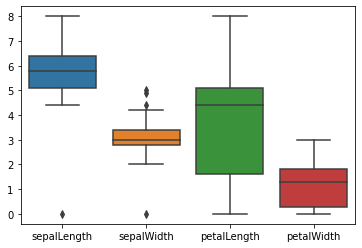

In [52]:
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0
df.loc[df['petalLength'].isnull(),'petalLength'] = 0
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0

# Pre-format DataFrame
stats_df = df.drop(['species'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [53]:
sL= [x for x in range(40,71)]
label_sL = (10*df['sepalLength']).isin(sL) #filtro largo sepalos


sW= [x for x in range(20,46)]
label_sW = (10*df['sepalWidth']).isin(sW)#filtro ancho sepalos


pL= [x for x in range(10,71)]
label_pL = (10*df['petalLength']).isin(pL) #filtro largo petalos


pW= [x for x in range(1,26)]
label_pW = (10*df['petalWidth']).isin(pW) #filtro ancho petalos

df['label']=label_sL & label_sW & label_pL & label_pW #agregar filtro

df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

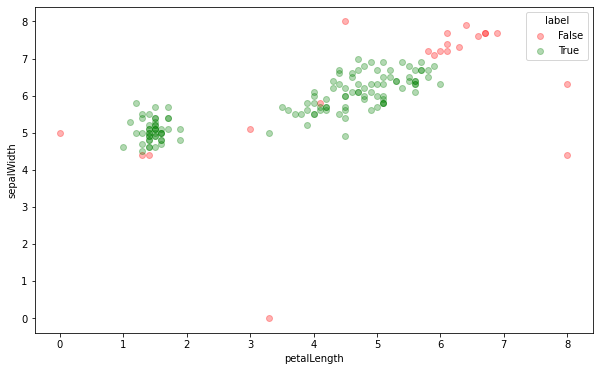

In [54]:
color_map = dict(zip(df["label"].unique(), 
                     ["red", "green"]))

plt.figure(figsize=(10, 6))

for lab, group in df.groupby("label"):
    plt.scatter(group["petalLength"], 
                group["sepalLength"],
                color=color_map[lab],
                alpha=0.3,
                edgecolor=None,
                label=lab,
               )
    
plt.legend(frameon=True, title="label")
plt.xlabel("petalLength")
plt.ylabel("sepalWidth")
plt.show()

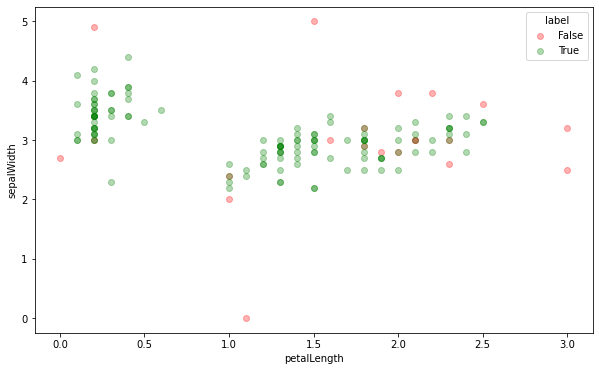

In [55]:
color_map = dict(zip(df["label"].unique(), 
                     ["red", "green"]))

plt.figure(figsize=(10, 6))

for lab, group in df.groupby("label"):
    plt.scatter(group["petalWidth"], 
                group["sepalWidth"],
                color=color_map[lab],
                alpha=0.3,
                edgecolor=None,
                label=lab,
               )
    
plt.legend(frameon=True, title="label")
plt.xlabel("petalLength")
plt.ylabel("sepalWidth")
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

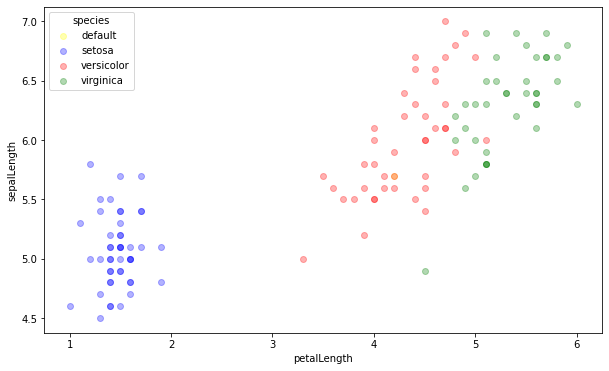

In [59]:
df_fil=df[df['label']] #filtro

color_map = dict(zip(df_fil["species"].unique(), 
                     ["green","red", "yellow","blue"]))

plt.figure(figsize=(10, 6))

for sp, group in df_fil.groupby("species"):
    plt.scatter(group["petalLength"], 
                group["sepalLength"],
                color=color_map[sp],
                alpha=0.3,
                edgecolor=None,
                label=sp,
               )
    
plt.legend(frameon=True, title="species")
plt.xlabel("petalLength")
plt.ylabel("sepalLength")
plt.show()